In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

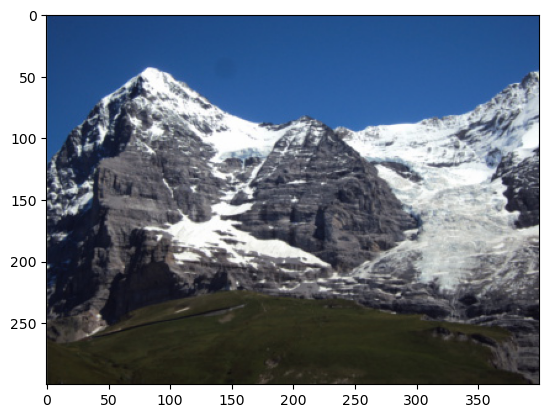

In [5]:
img = Image.open("Docs - Primitives-20230926\pics\M1.JPG")

plt.imshow(img)
plt.show()

In [6]:
img_arr = np.array(img)
img_arr.shape

(300, 400, 3)

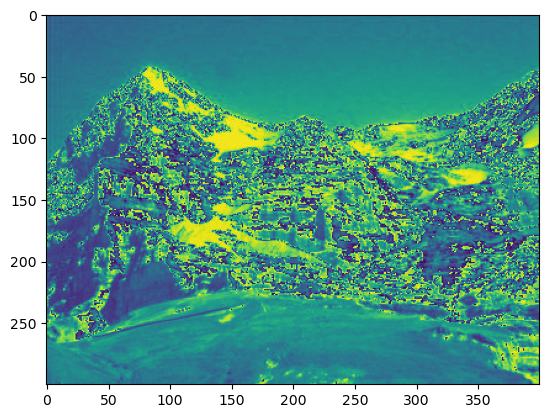

In [16]:
Amp = 1
img_gs = (img_arr[:,:,0] + img_arr[:,:,0] + img_arr[:,:,0]) * Amp /3 
plt.imshow(img_gs)

In [69]:
def gradiant(img, axis) :
    if axis == 1 : 
        grad = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    else :
        grad = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]).T
    print(len(img[:,1]),len(img[1,:]))

    out = np.zeros_like(img)
   
    for i in range(len(img[:,1])) :
        for j in range(len(img[1,:])):
            print([i,j])
            if i == 0 or j == 0 or j == len(img[1,:]) or i == len(img[:,1]):
                out[i,j] = 0
            else : 
                out[i,j] = sum(sum(np.multiply(img[i-1:i+2,j-1:j+2],grad)).T)

    

In [70]:
gradiant(img_gs, 1)

300 400
[0, 0]
[0, 1]
[0, 2]
[0, 3]
[0, 4]
[0, 5]
[0, 6]
[0, 7]
[0, 8]
[0, 9]
[0, 10]
[0, 11]
[0, 12]
[0, 13]
[0, 14]
[0, 15]
[0, 16]
[0, 17]
[0, 18]
[0, 19]
[0, 20]
[0, 21]
[0, 22]
[0, 23]
[0, 24]
[0, 25]
[0, 26]
[0, 27]
[0, 28]
[0, 29]
[0, 30]
[0, 31]
[0, 32]
[0, 33]
[0, 34]
[0, 35]
[0, 36]
[0, 37]
[0, 38]
[0, 39]
[0, 40]
[0, 41]
[0, 42]
[0, 43]
[0, 44]
[0, 45]
[0, 46]
[0, 47]
[0, 48]
[0, 49]
[0, 50]
[0, 51]
[0, 52]
[0, 53]
[0, 54]
[0, 55]
[0, 56]
[0, 57]
[0, 58]
[0, 59]
[0, 60]
[0, 61]
[0, 62]
[0, 63]
[0, 64]
[0, 65]
[0, 66]
[0, 67]
[0, 68]
[0, 69]
[0, 70]
[0, 71]
[0, 72]
[0, 73]
[0, 74]
[0, 75]
[0, 76]
[0, 77]
[0, 78]
[0, 79]
[0, 80]
[0, 81]
[0, 82]
[0, 83]
[0, 84]
[0, 85]
[0, 86]
[0, 87]
[0, 88]
[0, 89]
[0, 90]
[0, 91]
[0, 92]
[0, 93]
[0, 94]
[0, 95]
[0, 96]
[0, 97]
[0, 98]
[0, 99]
[0, 100]
[0, 101]
[0, 102]
[0, 103]
[0, 104]
[0, 105]
[0, 106]
[0, 107]
[0, 108]
[0, 109]
[0, 110]
[0, 111]
[0, 112]
[0, 113]
[0, 114]
[0, 115]
[0, 116]
[0, 117]
[0, 118]
[0, 119]
[0, 120]
[0, 121]
[0, 

ValueError: operands could not be broadcast together with shapes (3,2) (3,3) 